In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
np.random.seed(42)
apartments=[f"apy_{i}" for i in range (1,21)]
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
"Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))}


In [ ]:
df=pd.DataFrame(data)


In [ ]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,apy_1,22.483571
1,2025-07-02,apy_1,19.308678
2,2025-07-03,apy_1,23.238443
3,2025-07-04,apy_1,27.615149
4,2025-07-05,apy_1,18.829233
...,...,...,...
595,2025-07-26,apy_20,17.449918
596,2025-07-27,apy_20,18.650625
597,2025-07-28,apy_20,15.106181
598,2025-07-29,apy_20,17.778534


In [ ]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)
df


,Date,Apartment,Electricity_usage
0,2025-07-01,apy_1,22.48
1,2025-07-02,apy_1,19.31
2,2025-07-03,apy_1,23.24
3,2025-07-04,apy_1,27.62
4,2025-07-05,apy_1,18.83
...,...,...,...
595,2025-07-26,apy_20,17.45
596,2025-07-27,apy_20,18.65
597,2025-07-28,apy_20,15.11
598,2025-07-29,apy_20,17.78


In [ ]:
print(df.isnull().sum())
print(df.describe())
print(df.dtypes)


Date                 0
Apartment            0
Electricity_usage    0
dtype: int64
                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071
Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [ ]:
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())


Apartment
apy_11    642.31
apy_6     641.82
apy_13    634.22
apy_10    616.09
apy_20    613.14
apy_7     609.87
apy_8     607.18
apy_16    606.97
apy_14    604.33
apy_3     601.93
apy_4     596.99
apy_15    591.38
apy_19    586.61
apy_5     585.76
apy_2     581.81
apy_9     578.48
apy_1     571.80
apy_17    570.33
apy_12    568.99
apy_18    549.49
Name: Electricity_usage, dtype: float64
Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn


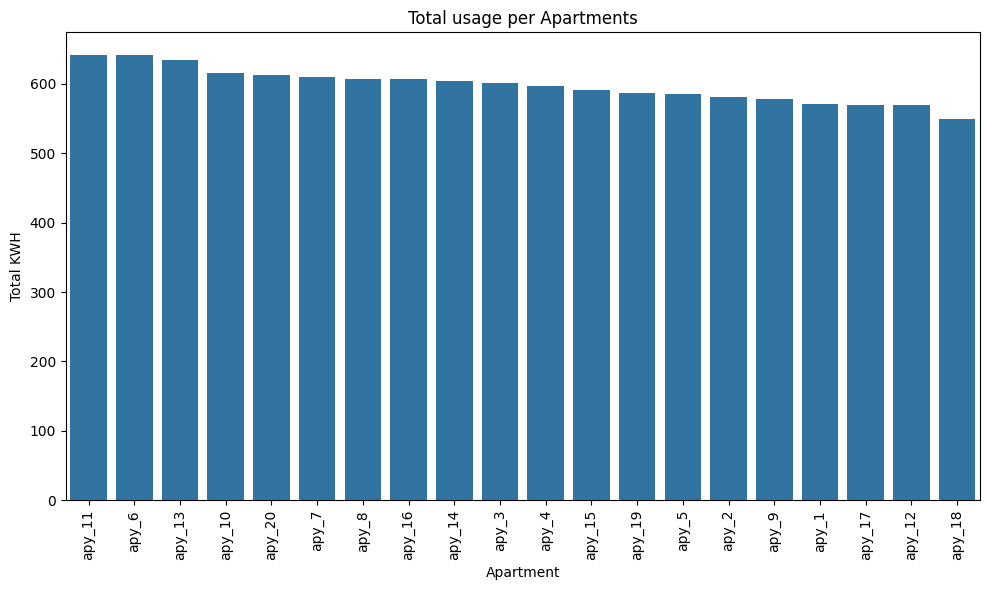

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()


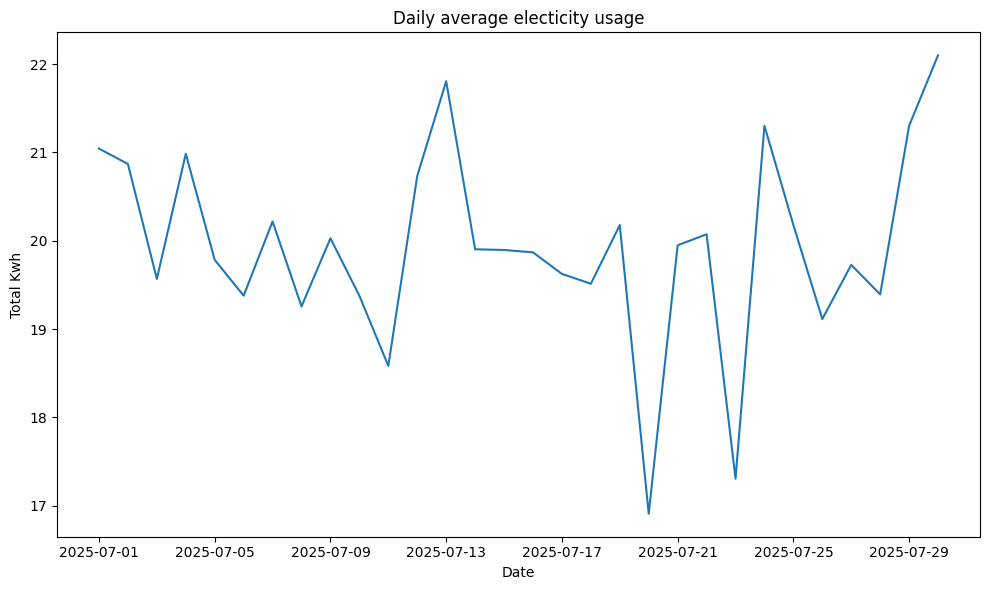

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Total Kwh")
plt.tight_layout()
plt.show()


In [ ]:
threshold=df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"]>threshold
print(df[df["High_usage_flag"]== True].head())

          Date Apartment  Electricity_usage  High_usage_flag
113 2025-07-24     apy_4              32.32             True
125 2025-07-06     apy_5              30.95             True
179 2025-07-30     apy_6              33.60             True
209 2025-07-30     apy_7              39.26             True
220 2025-07-11     apy_8              31.57             True
